## Import the libraries

> Add blockquote



In [94]:
import os  # Interacts with the operating system for file and directory management
import random  # Provides functions to generate random numbers and choose random items
import numpy as np  # Supports large-scale numerical data processing and arrays
import pandas as pd  # Offers data structures and tools for data analysis and manipulation
from PIL import Image  # Provides image processing capabilities
import tensorflow as tf  # Framework for building and training machine learning and deep learning models
import matplotlib.pyplot as plt  # Used for data visualization and plotting
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets
from tensorflow.keras.preprocessing.image import load_img, img_to_array  # Functions for loading and converting images
import cv2  # OpenCV library for advanced image processing and computer vision tasks
import warnings  # Helps to control and suppress warning messages
warnings.filterwarnings('ignore')  # Suppresses warnings to avoid clutter in the output
from tensorflow.keras import layers, models  # Modules for creating Keras-based neural networks
from tensorflow.keras.models import Sequential  # Linear stack of layers for building models in Keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Common layers for CNNs
from tensorflow.keras.utils import to_categorical  # Converts labels to categorical/one-hot encoded format
from tensorflow.keras.callbacks import ModelCheckpoint  # Allows saving model checkpoints during training
from keras.preprocessing.image import ImageDataGenerator  # Generates augmented images for training

In [95]:
#mounted with drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Task1: Data Understanding

## Load the images

In [96]:
# Define the base path
base_path = '/content/drive/MyDrive/AI&ML/Assignment'

# List of 3 subdirectory paths
subdirs = [
    'Full  Water level/Full  Water level',
    'Half water level/Half water level',
    'Overflowing/Overflowing'
]

In [97]:

image_size = (80, 80)  # Image dimensions
image_data = []  # List to store image arrays
class_labels = []  # List to store class labels
class_names = []  # List to store unique class names
corrupted_images = []  # List to store paths of corrupted images
from keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img
for subdir in subdirs:
    full_class_path = os.path.join(base_path, subdir)
    class_name = subdir.split("/")[-1]  # Extract the class name from the subdirectory
    class_names.append(class_name)

    for filename in os.listdir(full_class_path):
        image_path = os.path.join(full_class_path, filename)  # Full path to the image
        try:
            image = load_img(image_path, target_size=image_size)  # Load and resize image
            image_array = img_to_array(image)
            image_data.append(image_array)
            class_labels.append(class_names.index(class_name))  # Store class index in list
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            corrupted_images.append(image_path)

X_data = np.array(image_data) #X_data contains the image data
y_labels = np.array(class_labels)# y_labels contains the class labels

#### How many total images are in the dataset?

In [98]:
#print total images
print("Number of images:", len(X_data))
print("Shape of images:", X_data.shape)
print("Number of classes:", len(class_names))
print("Class names:", class_names)

Number of images: 486
Shape of images: (486, 80, 80, 3)
Number of classes: 3
Class names: ['Full  Water level', 'Half water level', 'Overflowing']


#### How balanced is the dataset?i.e. image per class or label

In [99]:
# Print the count of images in each class
for subdir in subdirs:
    subdir_path = os.path.join(base_path, subdir)
    num_images = len(os.listdir(subdir_path))
    print("Number of images in class", subdir, ": ", num_images)

Number of images in class Full  Water level/Full  Water level :  308
Number of images in class Half water level/Half water level :  139
Number of images in class Overflowing/Overflowing :  39


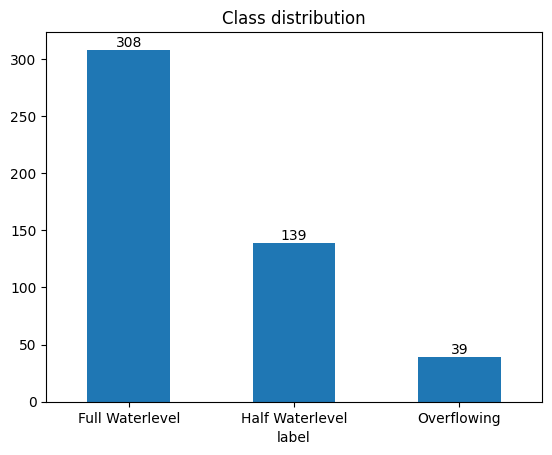

In [100]:
#label mapping
label_mapping = {
     0:'Full Waterlevel',
     1: 'Half Waterlevel',
    2: 'Overflowing'
}
df = pd.DataFrame({"label":y_labels})
df['label'] = df['label'].map(label_mapping)


# Generate a bar plot for the counts of each label
ax = df['label'].value_counts().sort_index().plot(kind='bar')
# Annotate each bar with its count value
for i, count in enumerate(df['label'].value_counts().sort_index()):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.xticks(rotation = 0)
plt.title('Class distribution')
plt.show()

## Plot the images

### Visualize at least one image per class.

##### Investigate Visually whether there are any corrupted images or not.


In [101]:
#check and print corrupted image
if corrupted_images:
    print("Corrupted images found:")
    for image_path in corrupted_images:
        print(image_path)
else:
    print("No corrupted images found.")

No corrupted images found.


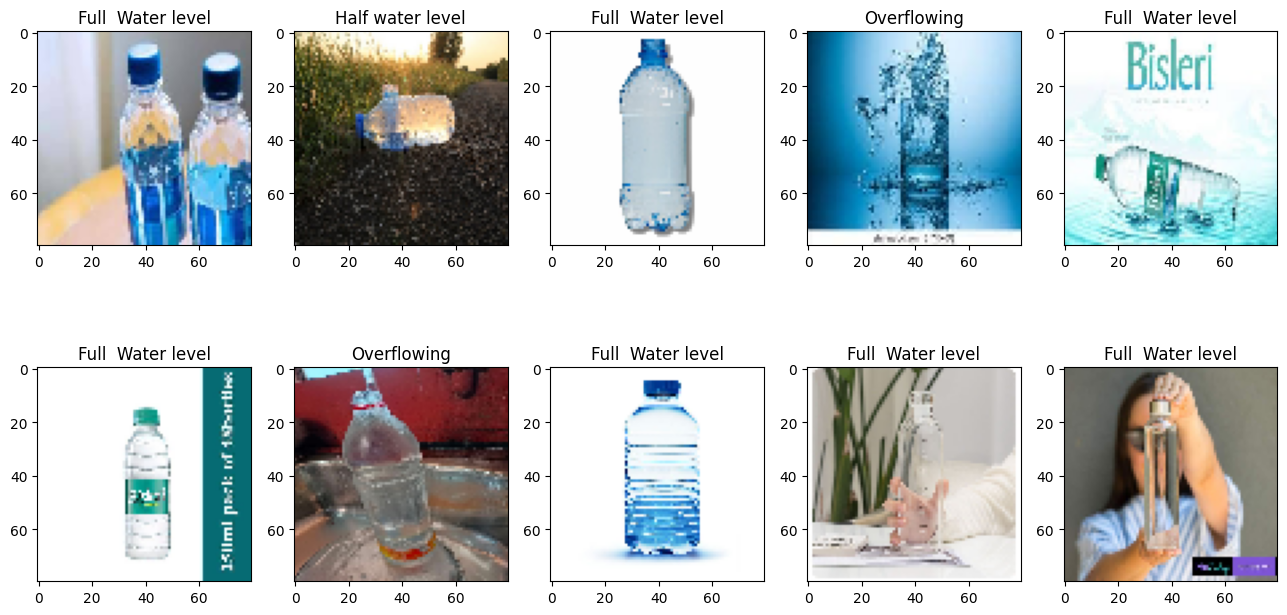

In [102]:
# plotting the images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 8))
for i in range(2):
    for j in range(5):
        if corrupted_images:
            # If there are corrupted images, display them
            image_path = corrupted_images.pop(0)
            axes[i, j].imshow(plt.imread(image_path))
            axes[i, j].set_title("Corrupted Image")
        else:
            idx = np.random.randint(len(X_data))  # Get a random index from the image data
            # Display the image at the random index in the corresponding subplot
            axes[i, j].imshow(X_data[idx].astype(np.uint8))
            axes[i, j].set_title(class_names[y_labels[idx]])
plt.show()

### Data Pre - processing:

In [103]:
# directory to each classes
full_data_directory = base_path+"/Full  Water level/Full  Water level"
half_data_directory =  base_path+"/Half water level/Half water level"
overflowing_data_directory =  base_path+"/Overflowing/Overflowing"

In [104]:
image_path = os.path.join(overflowing_data_directory,'download (13)_5_11zon.jpeg')
# Convert the loaded image into a NumPy array format
img = load_img(image_path)
x = img_to_array(img)

#Reshape the array to add a batch dimension at the beginning
x = x.reshape((1,) + x.shape)
print('shape of image', x.shape)

shape of image (1, 194, 259, 3)


In [105]:
datagen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                             rotation_range=10,fill_mode='nearest')

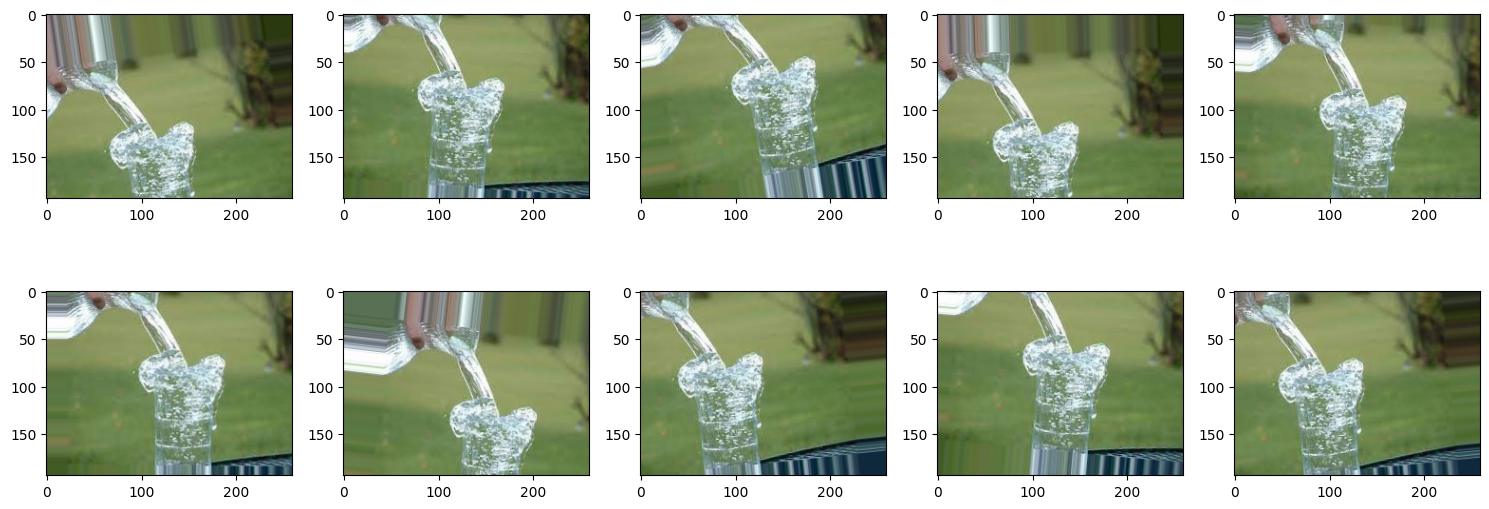

In [106]:
# Create a figure with a row of subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  #10 subplots in one row, each with a size of 3x3 inches

# plotting the augment images of a image
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    if i >= 10:
        break  # Stop after displaying 5 augmented images
    row = i // 5
    col = i % 5
    img_to_show = (batch[0]).astype('uint8')
    axes[row][col].imshow(img_to_show)

# Show the plot
plt.tight_layout()
plt.show()

#### Perform augmentation

In [107]:

image_data = []  # List to store image data
image_labels = []  # List to store class labels
input_dimension = 80  # Input size for resizing images
image_dimensions = (input_dimension, input_dimension)

for class_folder in os.listdir(base_path):  # Get each subdirectory (class)
    class_folder_path = os.path.join(base_path, class_folder)

    for sub_folder in os.listdir(class_folder_path):
        sub_folder_path = os.path.join(class_folder_path, sub_folder)  # Full path for sub-folder

        for image_file in os.listdir(sub_folder_path):
            # Only process image files with '.jpeg' or '.png' extensions
            if image_file.endswith(".jpeg") or image_file.endswith(".png"):

                image_path = os.path.join(sub_folder_path, image_file)
                image = cv2.imread(image_path)  # Read the image into a NumPy array
                image = cv2.resize(image, image_dimensions)  # Resize the image to the set size

                # Append the image and its label to their respective lists
                image_data.append(image)
                image_labels.append(class_folder)

In [108]:

image_data = np.array(image_data) / 255
image_labels = np.array(image_labels)
print(f'image_data shape:{image_data.shape}')
print(f'image_labels shape:{image_labels.shape}')

image_data shape:(486, 80, 80, 3)
image_labels shape:(486,)


In [109]:
imgs= image_data
labels= image_labels
augmentation_rounds =40  # Number of augmentation cycles

# ImageDataGenerator object to augment the images
augmentor = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                             rotation_range=10,fill_mode='nearest')
augmentor.fit(imgs)
# Lists to hold augmented images and labels
augmented_images =[]
augmented_labels = []

# Generate augmented images
for image_batch, label_batch in augmentor.flow(imgs, labels, batch_size=32):
    augmented_images.append(image_batch)
    augmented_labels.append(label_batch)
    if len(augmented_images) >= augmentation_rounds:
        break

# concatenate the augmented images into the original matrix
images_data = np.concatenate((imgs, np.concatenate(augmented_images)))
labels = np.concatenate((labels, np.concatenate(augmented_labels)))

#print
print(f"Combined images shape: {images_data.shape}")
print(f"Combined labels shape: {labels.shape}")
label_dataframe = pd.DataFrame({"label": labels})
print("Label distribution:")
print(label_dataframe["label"].value_counts())

Combined images shape: (1714, 80, 80, 3)
Combined labels shape: (1714,)
Label distribution:
label
Full  Water level    1084
Half water level      496
Overflowing           134
Name: count, dtype: int64


#### spliting the dataset into train and validation

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images_data, labels, test_size=0.2, random_state=42)

In [111]:
#print
print(f'X_train shape:{X_train.shape}')
print(f'labels shape:{labels.shape}')
df = pd.DataFrame({"label":labels})
print(df.value_counts())
print("")
print(f'test_date shape:{X_test.shape}')
print(f'test_labels shape:{y_test.shape}')
df = pd.DataFrame({"test_labels":y_test})
print(df.value_counts())

X_train shape:(1371, 80, 80, 3)
labels shape:(1714,)
label            
Full  Water level    1084
Half water level      496
Overflowing           134
Name: count, dtype: int64

test_date shape:(343, 80, 80, 3)
test_labels shape:(343,)
test_labels      
Full  Water level    219
Half water level     101
Overflowing           23
Name: count, dtype: int64


#### Normalize the image data and convert the lables into one hot encoding

In [112]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
# convert the ordinal value to one hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=3)

y_test = le.fit_transform(y_test)
y_test_one_hot = to_categorical(y_test, num_classes=3)

#### Plot the resize images

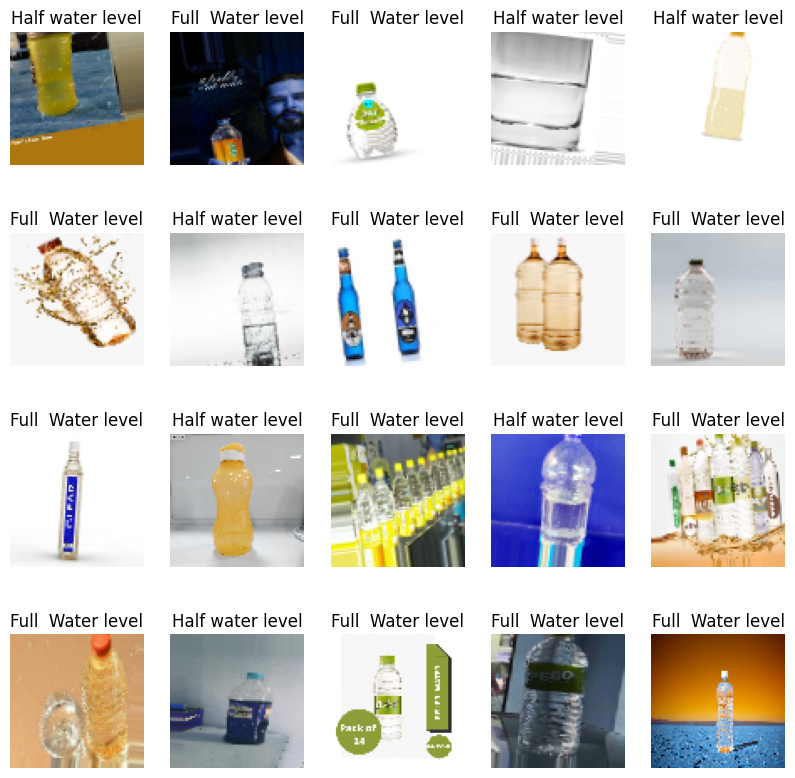

In [113]:
'''
Show a sample of images from the dataset
'''

import matplotlib.pyplot as plt

# Load the data
data = images_data
indices = np.random.randint(0, len(data), 20)
sample_images = data[indices]
# plotting the resize images
fig = plt.figure(figsize=(10,10))
for i, img in enumerate(sample_images):
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(labels[indices[i]])

plt.show()

## Task2: Building Fully Connected Neural Network

#### FCN Model

In [114]:
from tensorflow import keras
from tensorflow.keras import layers

# Number of output classes
num_classes = 3
input_size =80
tf.random.set_seed(42)# Ensure reproducibility

# Model definition
model_fcn = keras.Sequential([
    # Normalization: scales data to 0-1 range
    layers.Rescaling(1./255, input_shape=(input_size, input_size, 3)),
    layers.Flatten(),
    # Flatten layer removed
    layers.Dense(256, activation='relu'),  # Fully connected layer
    layers.BatchNormalization(),
    layers.Dropout(0.3),# Dropout for regularization

    layers.Dense(128, activation='relu'),  # relu activation
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(num_classes, activation='softmax')  # Output layer with softmax for classification
])

In [115]:
# Compile the model
model_fcn.compile(
    optimizer='adam',  # Optimizer
    loss='categorical_crossentropy',  # Loss function
    metrics=['accuracy']  # Metrics to evaluate
)
# Display model summary
model_fcn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 80, 80, 3)         0         
                                                                 
 flatten_7 (Flatten)         (None, 19200)             0         
                                                                 
 dense_18 (Dense)            (None, 256)               4915456   
                                                                 
 batch_normalization_6 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                      

#### Train the model

In [116]:
epochs = 15 #epochs 15
history_fcn= model_fcn.fit(
    X_train,
     y_train_one_hot,  # one hot lable
    batch_size=32,
    epochs=epochs ,
    validation_split=0.2
)
#save
model_fcn.save_weights(f'epochs{epochs}_fcn.h5')

Epoch 1/15
35/35 [==============================] - 3s 17ms/step - loss: 1.4160 - accuracy: 0.4279 - val_loss: 0.9515 - val_accuracy: 0.6182
Epoch 2/15
35/35 [==============================] - 0s 10ms/step - loss: 1.1367 - accuracy: 0.5182 - val_loss: 0.9394 - val_accuracy: 0.6073
Epoch 3/15
35/35 [==============================] - 0s 10ms/step - loss: 1.0005 - accuracy: 0.5785 - val_loss: 0.8722 - val_accuracy: 0.6727
Epoch 4/15
35/35 [==============================] - 0s 9ms/step - loss: 0.9101 - accuracy: 0.6277 - val_loss: 0.8445 - val_accuracy: 0.6764
Epoch 5/15
35/35 [==============================] - 0s 10ms/step - loss: 0.8744 - accuracy: 0.6432 - val_loss: 0.8338 - val_accuracy: 0.6509
Epoch 6/15
35/35 [==============================] - 0s 10ms/step - loss: 0.8243 - accuracy: 0.6560 - val_loss: 0.8747 - val_accuracy: 0.5855
Epoch 7/15
35/35 [==============================] - 0s 10ms/step - loss: 0.8285 - accuracy: 0.6661 - val_loss: 0.8584 - val_accuracy: 0.6036
Epoch 8/15
35/

#### Evaluate the model

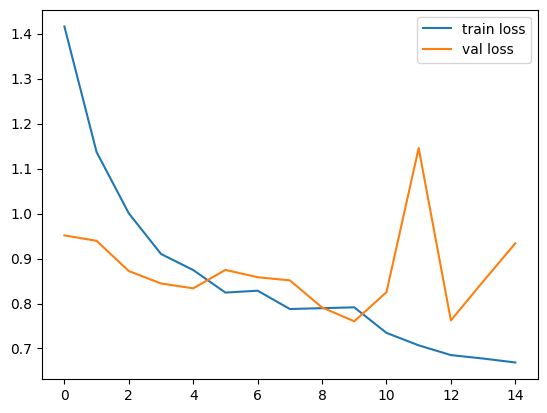

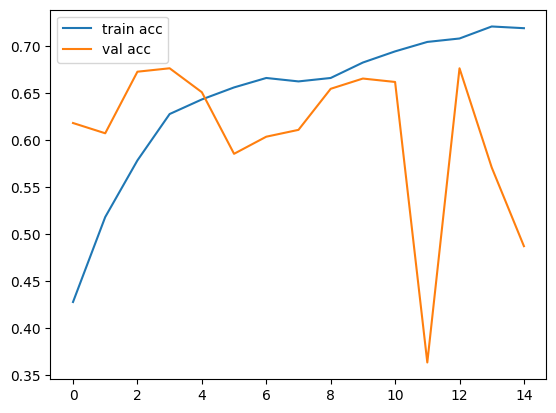

<Figure size 640x480 with 0 Axes>

In [117]:
# plot the loss
plt.plot(history_fcn.history['loss'], label='train loss')
plt.plot(history_fcn.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history_fcn.history['accuracy'], label='train acc')
plt.plot(history_fcn.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [118]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
# test_loss, test_accuracy = model_fcn.evaluate(X_test, y_test_one_hot, verbose=0)
# print("Test loss:", test_loss)
# print("Test accuracy:", test_accuracy)
# Make predictions on the test set
y_pred = model_fcn.predict(X_test)
# Get the predicted class (argmax to get index of the highest probability)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted classes from one-hot encoding
y_true_classes = np.argmax(y_test_one_hot, axis=1)  # True classes from one-hot encoding

accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy:", accuracy)

print("Confusion matrix:")
confusion_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print(confusion_matrix)

print("\nClassification report:")
print(classification_report(y_true_classes, y_pred_classes))

print("\nAccuracy score:", accuracy_score(y_true_classes, y_pred_classes))
print("F1 score:", f1_score(y_true_classes, y_pred_classes, average='weighted'))

11/11 [==============================] - 0s 5ms/step
Accuracy: 0.4752186588921283
Confusion matrix:
[[ 89 130   0]
 [ 27  74   0]
 [ 15   8   0]]

Classification report:
              precision    recall  f1-score   support

           0       0.68      0.41      0.51       219
           1       0.35      0.73      0.47       101
           2       0.00      0.00      0.00        23

    accuracy                           0.48       343
   macro avg       0.34      0.38      0.33       343
weighted avg       0.54      0.48      0.46       343


Accuracy score: 0.4752186588921283
F1 score: 0.463948487917042


<Axes: >

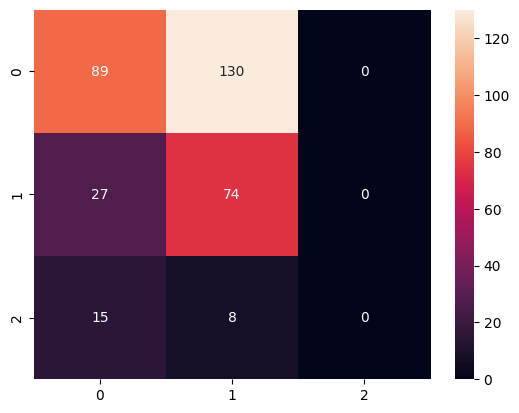

In [119]:
#seaborn
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True, fmt='d')

#### Predict the model

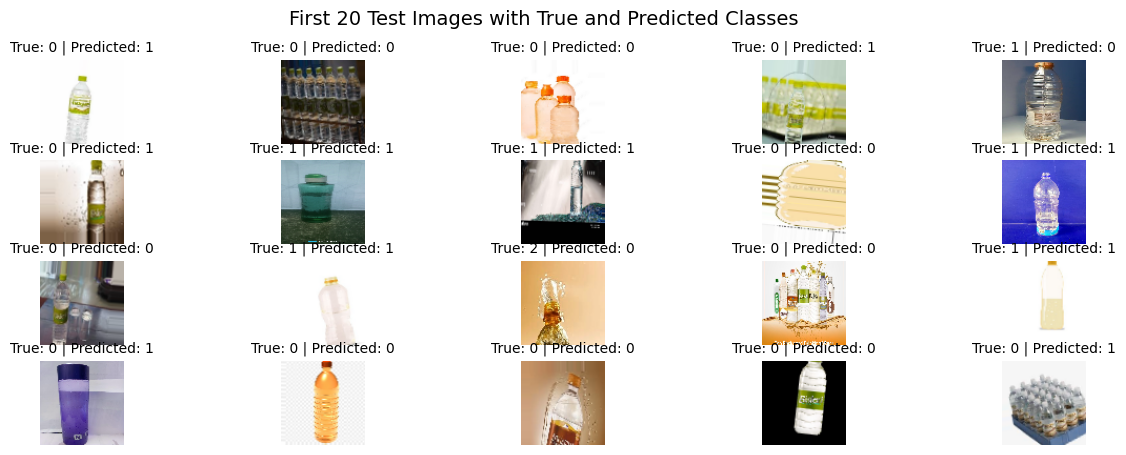

In [120]:
# Number of images to display
num_images = 20

# Plot the first 10 test images with their actual and predicted labels
plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(4, 5, i + 1)
    plt.imshow((X_test[i] * 255).astype(np.uint8))  # Display the image
    plt.axis('off')  # Hide the axis

    # Title with actual and predicted class
    title = f"True: {y_true_classes[i]} | Predicted: {y_pred_classes[i]}"
    plt.title(title, fontsize=10)

plt.suptitle("First 20 Test Images with True and Predicted Classes", fontsize=14)
plt.show()

## Task3: Building Convolutional Neural Network


#### CNN Block with FCN

In [121]:

from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers

input_size = 80 #input size

tf.random.set_seed(42)

model_cnn = keras.Sequential([
        keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(input_size,input_size,3)), #the size of the input images
        keras.layers.Conv2D(32, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2), #reduce the spatial dimensions
        keras.layers.Dropout(0.2),

        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2), # reduce the spatial dimensions
        keras.layers.Dropout(0.2), #dropout rate of 0.2

        keras.layers.Conv2D(256, (3,3), activation='relu'),
        keras.layers.Conv2D(256, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2), # reduce the spatial dimensions
        keras.layers.Dropout(0.2), #dropout rate of 0.2

        keras.layers.Flatten(),
        keras.layers.Dense(1024, activation='relu'),
        keras.layers.Dropout(0.5), #dropout rate of 0.2
        keras.layers.Dense(3, activation='softmax')
    ])

In [122]:

# Compile the model
model_cnn.compile(
    optimizer='adam',  # Optimizer
    loss='categorical_crossentropy',  # Loss function
    metrics=['accuracy']  # Metrics to evaluate
)
model_cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 78, 78, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 76, 76, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 38, 38, 32)        0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 38, 38, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 36, 36, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 34, 34, 64)        36928     
                                                      

#### Train the CNN model

In [123]:
epochs = 15 #epochs 15
history_cnn= model_cnn.fit(
    X_train,
     y_train_one_hot,  # one hot lable
    batch_size=32,
    epochs=epochs ,
    validation_split=0.2
)
model_cnn.save_weights(f'epochs{epochs}_cnn.h5')

Epoch 1/15
35/35 [==============================] - 3s 35ms/step - loss: 0.8807 - accuracy: 0.6168 - val_loss: 0.8564 - val_accuracy: 0.6255
Epoch 2/15
35/35 [==============================] - 1s 27ms/step - loss: 0.8048 - accuracy: 0.6442 - val_loss: 0.7716 - val_accuracy: 0.6764
Epoch 3/15
35/35 [==============================] - 1s 27ms/step - loss: 0.7621 - accuracy: 0.6396 - val_loss: 0.7778 - val_accuracy: 0.6255
Epoch 4/15
35/35 [==============================] - 1s 27ms/step - loss: 0.7083 - accuracy: 0.6661 - val_loss: 0.7115 - val_accuracy: 0.6945
Epoch 5/15
35/35 [==============================] - 1s 28ms/step - loss: 0.6431 - accuracy: 0.7135 - val_loss: 0.7934 - val_accuracy: 0.5818
Epoch 6/15
35/35 [==============================] - 1s 28ms/step - loss: 0.6443 - accuracy: 0.7099 - val_loss: 0.6590 - val_accuracy: 0.7164
Epoch 7/15
35/35 [==============================] - 1s 31ms/step - loss: 0.6328 - accuracy: 0.7217 - val_loss: 0.7050 - val_accuracy: 0.6618
Epoch 8/15
35

#### Evaluation of CNN model

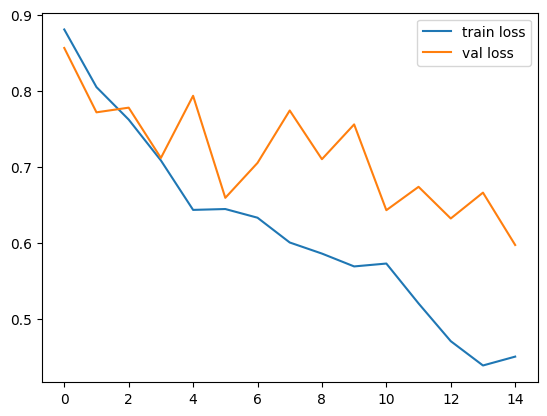

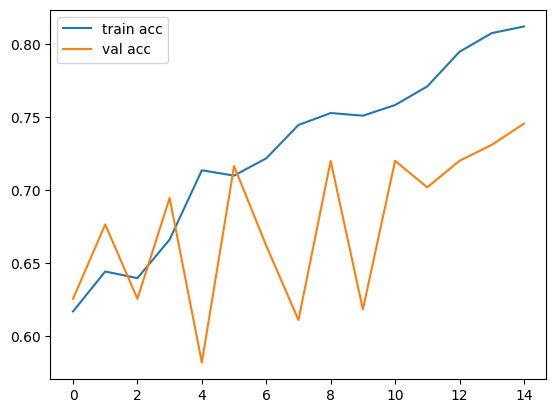

<Figure size 640x480 with 0 Axes>

In [124]:
# plot the loss
plt.plot(history_cnn.history['loss'], label='train loss')
plt.plot(history_cnn.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history_cnn.history['accuracy'], label='train acc')
plt.plot(history_cnn.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#### Prediction of CNN model

In [125]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
# test_loss, test_accuracy = model_fcn.evaluate(X_test, y_test_one_hot, verbose=0)

# print("Test loss:", test_loss)
# print("Test accuracy:", test_accuracy)

# Make predictions on the test set
y_pred = model_cnn.predict(X_test)

# Get the predicted class (argmax to get index of the highest probability)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted classes from one-hot encoding
y_true_classes = np.argmax(y_test_one_hot, axis=1)  # True classes from one-hot encoding

accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy:", accuracy)


print("Confusion matrix:")
confusion_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print(confusion_matrix)

print("\nClassification report:")
print(classification_report(y_true_classes, y_pred_classes))

print("\nAccuracy score:", accuracy_score(y_true_classes, y_pred_classes))
print("F1 score:", f1_score(y_true_classes, y_pred_classes, average='weighted'))


11/11 [==============================] - 0s 5ms/step
Accuracy: 0.7521865889212828
Confusion matrix:
[[172  43   4]
 [ 20  81   0]
 [  5  13   5]]

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       219
           1       0.59      0.80      0.68       101
           2       0.56      0.22      0.31        23

    accuracy                           0.75       343
   macro avg       0.67      0.60      0.61       343
weighted avg       0.77      0.75      0.75       343


Accuracy score: 0.7521865889212828
F1 score: 0.7493631282968447


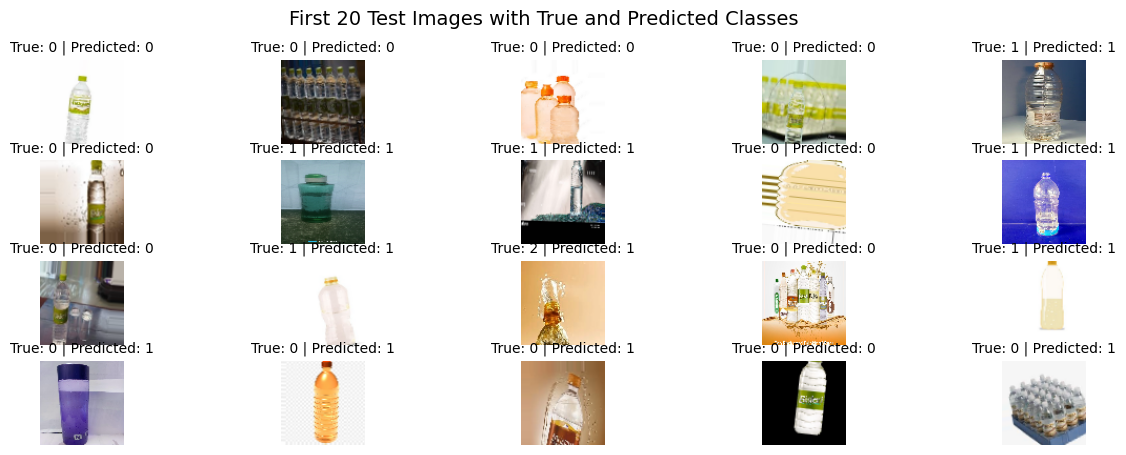

In [126]:
# Number of images to display
num_images = 20

# Plot the first 10 test images with their actual and predicted labels
plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(4, 5, i + 1)
    plt.imshow((X_test[i] * 255).astype(np.uint8))  # Display the image
    plt.axis('off')  # Hide the axis

    # Title with actual and predicted class
    title = f"True: {y_true_classes[i]} | Predicted: {y_pred_classes[i]}"
    plt.title(title, fontsize=10)

plt.suptitle("First 20 Test Images with True and Predicted Classes", fontsize=14)
plt.show()

1/1 [==============================] - 0s 25ms/step


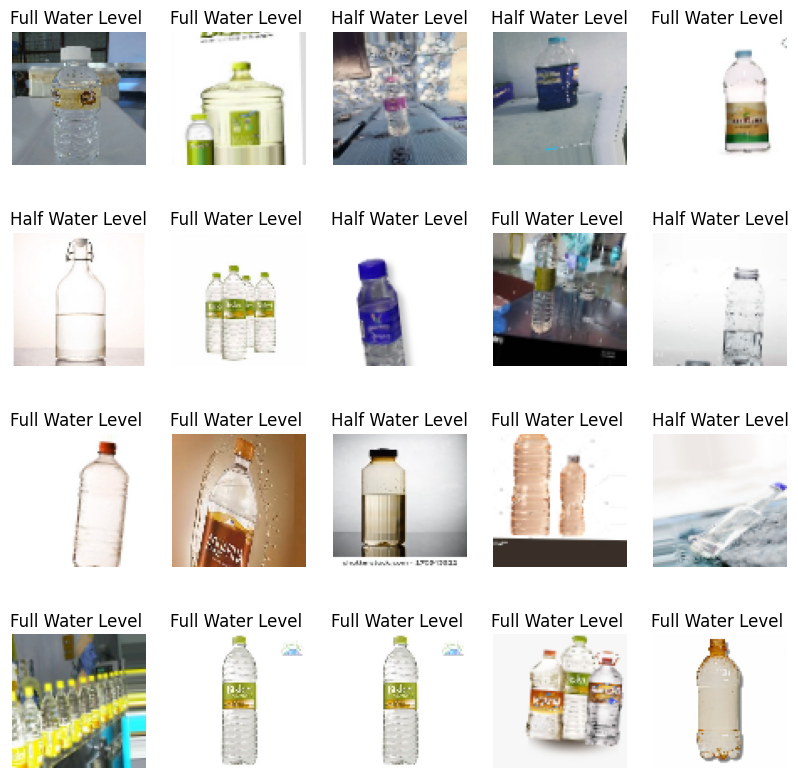

In [127]:
import numpy as np
import matplotlib.pyplot as plt

indices = np.random.randint(0, len(X_test), 20)
sample_images = X_test[indices]
predictions = model_cnn.predict(sample_images)

class_names = ['Full Water Level ', 'Half Water Level', 'Overflowing']
# plotting the image
fig = plt.figure(figsize=(10,10))
for i, img in enumerate(sample_images):
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    predicted_class = class_names[np.argmax(predictions[i])]
    plt.title(predicted_class)

plt.show()

## Task4: Transfer Learning.

#### Build the MobileNetV2 using pretrained Weights

In [128]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf
tf.random.set_seed(42)


X_train = X_train
y_train = y_train_one_hot
input_shape = (input_size, input_size, 3)

# Load the MobileNetV2 model with pre-trained weights and exclude the top layers
base_model = MobileNetV2(include_top=False, input_shape=input_shape)



#### Restructure the model

In [129]:
# Freeze all layers in the base model to retain pre-trained weights
for layer in base_model.layers:
    layer.trainable = False

# Add new layers for transfer learning on top of the base model
x = Flatten()(base_model.output)  # Flatten the output of the base model
x = Dense(128, activation='relu')(x)  # Dense layer with ReLU activation
x = Dense(3, activation='softmax')(x)  # Final output layer with softmax activation for 3 classes


# Create a new model with modified top layers
transfer_learning_model = Model(inputs=base_model.input, outputs=x)

# Compile the model with appropriate loss function, optimizer, and evaluation metric
transfer_learning_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



#### Train the MobileNetV2 model with modified FCN layer

In [130]:
# Train the model with a validation split to monitor performance during training
history_MobileNetV2 = transfer_learning_model.fit(
    X_train,
    y_train,
    epochs=10,  # Number of training epochs
    batch_size=32,  # Batch size for training
    validation_split=0.2  # Split 20% of the data for validation
)
# Print the highest validation accuracy achieved during training
print("Test accuracy: ", max(history_MobileNetV2.history['val_accuracy']))

Epoch 1/10
35/35 [==============================] - 6s 42ms/step - loss: 3.4158 - accuracy: 0.6542 - val_loss: 0.5715 - val_accuracy: 0.8145
Epoch 2/10
35/35 [==============================] - 0s 13ms/step - loss: 0.3071 - accuracy: 0.8896 - val_loss: 0.4791 - val_accuracy: 0.8509
Epoch 3/10
35/35 [==============================] - 0s 13ms/step - loss: 0.1588 - accuracy: 0.9462 - val_loss: 0.4493 - val_accuracy: 0.8364
Epoch 4/10
35/35 [==============================] - 0s 13ms/step - loss: 0.0619 - accuracy: 0.9854 - val_loss: 0.3831 - val_accuracy: 0.8582
Epoch 5/10
35/35 [==============================] - 1s 15ms/step - loss: 0.0348 - accuracy: 0.9945 - val_loss: 0.3757 - val_accuracy: 0.8727
Epoch 6/10
35/35 [==============================] - 1s 16ms/step - loss: 0.0225 - accuracy: 0.9973 - val_loss: 0.3909 - val_accuracy: 0.8691
Epoch 7/10
35/35 [==============================] - 0s 13ms/step - loss: 0.0172 - accuracy: 0.9973 - val_loss: 0.3600 - val_accuracy: 0.8800
Epoch 8/10
35

### Evaluation of the MobileNetV2 model

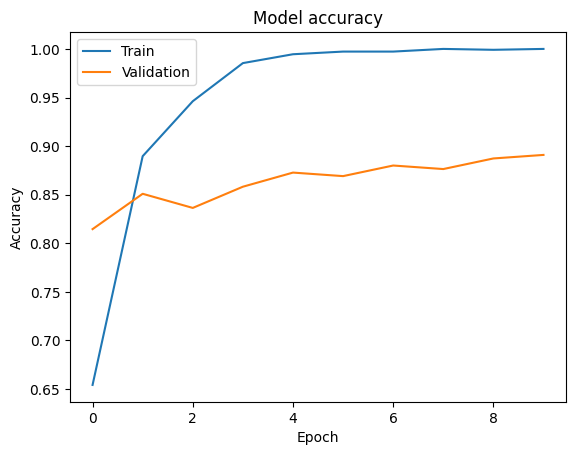

In [131]:
#plot
plt.plot(history_MobileNetV2.history['accuracy'])
plt.plot(history_MobileNetV2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

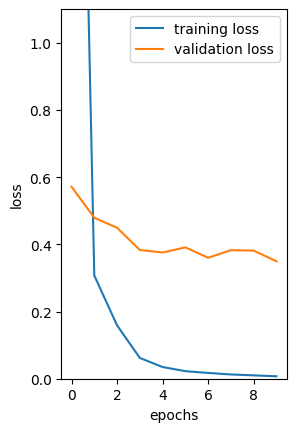

In [132]:
#plot
plt.subplot(1,2,1)
plt.plot(history_MobileNetV2.history['loss'], label='training loss')
plt.plot(history_MobileNetV2.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.ylim(0,1.1)
plt.show()

In [134]:
loss, accuracy = transfer_learning_model.evaluate(X_test, y_test_one_hot, verbose=0)
#print loss and  accuracy
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Test loss: 0.2823418378829956
Test accuracy: 0.9037901163101196


In [135]:
y_pred = transfer_learning_model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_one_hot, axis=1)

# Calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy:", accuracy)

11/11 [==============================] - 2s 19ms/step
Accuracy: 0.9037900874635568


In [136]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

#print
print("Confusion matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

print("\nClassification report:")
print(classification_report(y_test_classes, y_pred_classes))

print("\nAccuracy score:", accuracy_score(y_test_classes, y_pred_classes))
print("F1 score:", f1_score(y_test_classes, y_pred_classes, average='weighted'))

Confusion matrix:
[[206  12   1]
 [ 13  86   2]
 [  1   4  18]]

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       219
           1       0.84      0.85      0.85       101
           2       0.86      0.78      0.82        23

    accuracy                           0.90       343
   macro avg       0.88      0.86      0.87       343
weighted avg       0.90      0.90      0.90       343


Accuracy score: 0.9037900874635568
F1 score: 0.9035722688233614


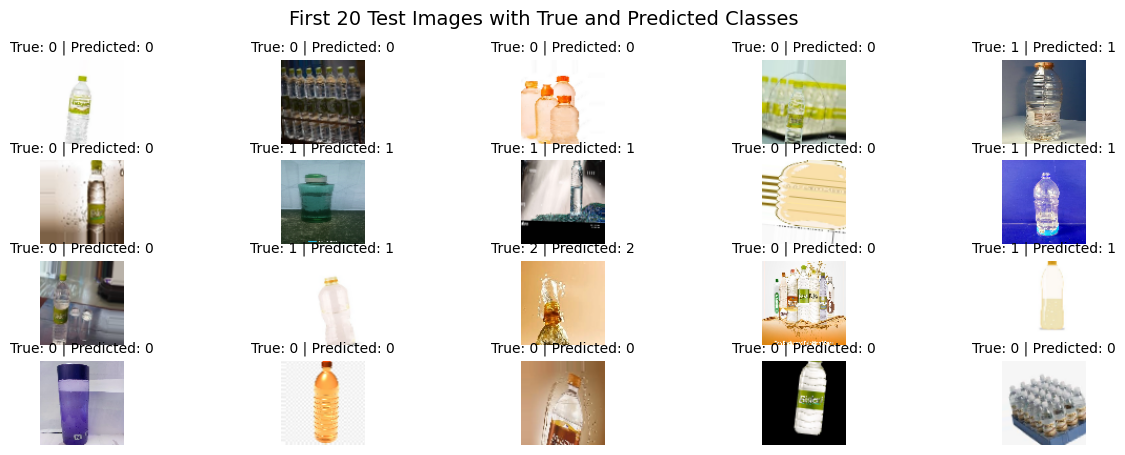

In [137]:
# Number of images to display
num_images = 20

# Plot the first 10 test images with their actual and predicted labels
plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(4, 5, i + 1)
    plt.imshow((X_test[i] * 255).astype(np.uint8))  # Display the image
    plt.axis('off')  # Hide the axis

    # Title with actual and predicted class
    title = f"True: {y_true_classes[i]} | Predicted: {y_pred_classes[i]}"
    plt.title(title, fontsize=10)

plt.suptitle("First 20 Test Images with True and Predicted Classes", fontsize=14)
plt.show()

#### Comparision of three different model

In [138]:
#Comparision of three different model
val_acc_fcn = history_fcn.history['val_accuracy'][-1]
val_acc_cnn = history_cnn.history['val_accuracy'][-1]
val_acc_MobileNetV2 = history_MobileNetV2.history['val_accuracy'][-1]

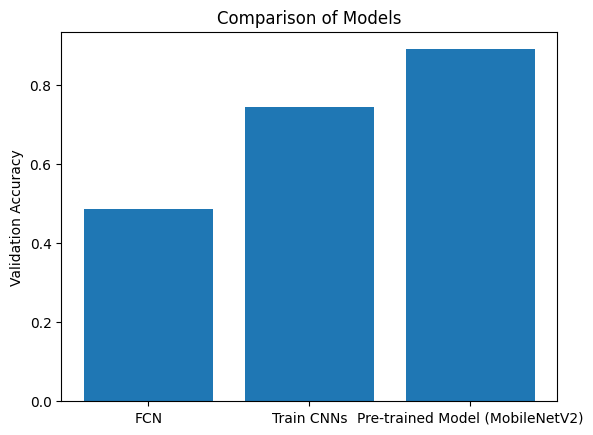

In [140]:
#plot
fig, ax = plt.subplots()
models = ['FCN','Train CNNs', 'Pre-trained Model (MobileNetV2)']
val_accs = [val_acc_fcn,val_acc_cnn, val_acc_MobileNetV2]
ax.bar(models, val_accs)
ax.set_ylabel('Validation Accuracy')
ax.set_title('Comparison of Models')
plt.show()